In [80]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [81]:
path = "C:/Users/VIDIT/Desktop/Codes/CSoc/housing.csv"
df = pd.read_csv(path)
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

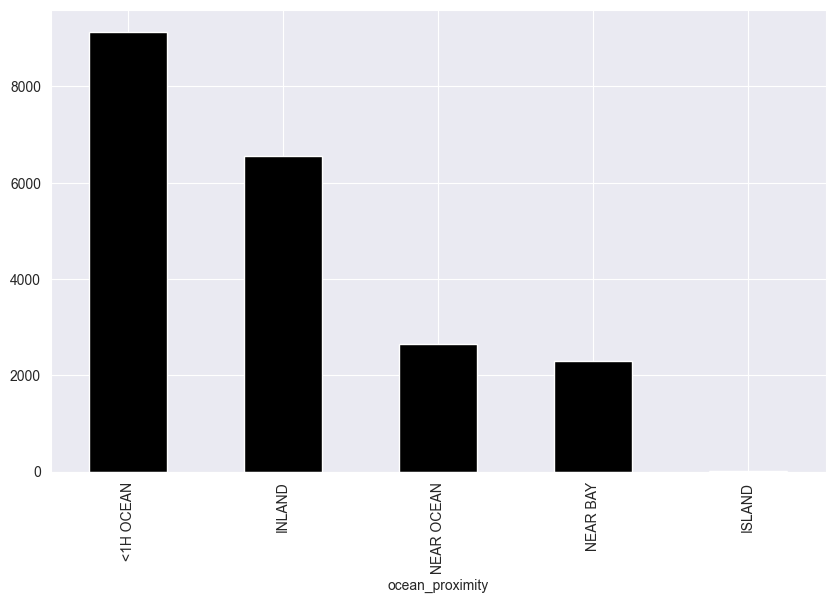

In [82]:
frequency = df['ocean_proximity'].value_counts()
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='black')
plt.show()

In [83]:
print((df['ocean_proximity']=="ISLAND").sum())

5


In [84]:
df.drop(df[df['ocean_proximity'] == "ISLAND"].index, inplace=True)

In [86]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN": -1, "INLAND": 0, "NEAR OCEAN": 1, "NEAR BAY": 2})
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


In [92]:
#Normalizing dataset
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = ['Longitude', 'Latitude', 'Housing_median_age', 'Total_rooms', 'Total_bedroom', 'Population', 'Household', 'Median_income', 'Median_house_value', 'Ocean_proximity'])
df.head()

,Longitude,Latitude,Housing_median_age,Total_rooms,Total_bedroom,Population,Household,Median_income,Median_house_value,Ocean_proximity
0,-1.327587,1.052307,0.982535,-0.804871,-0.970299,-0.974532,-0.977104,2.344450,2.130423,2.084697
1,-1.322596,1.042944,-0.606833,2.045604,1.348077,0.861225,1.669700,2.331923,1.314784,2.084697
2,-1.332578,1.038262,1.856687,-0.535820,-0.825549,-0.820890,-0.843718,1.782425,1.259310,2.084697
3,-1.337569,1.038262,1.856687,-0.624281,-0.718766,-0.766144,-0.733870,0.932756,1.165698,2.084697
4,-1.337569,1.038262,1.856687,-0.462484,-0.611983,-0.759963,-0.629254,-0.013024,1.173499,2.084697


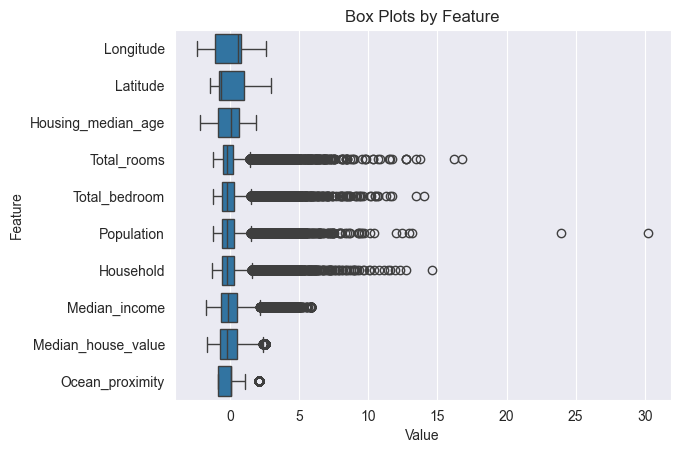

<Figure size 1000x600 with 0 Axes>

In [93]:
df_melted = df.melt(var_name='Feature', value_name='Value')
sns.boxplot(y='Feature', x='Value', data=df_melted, )
plt.title("Box Plots by Feature")
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

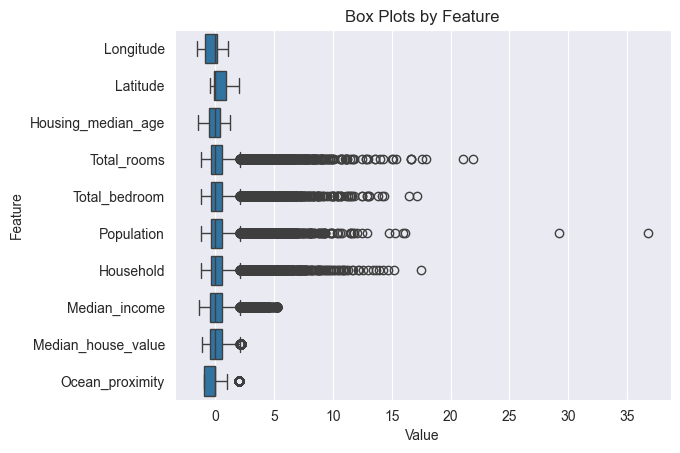

<Figure size 1000x600 with 0 Axes>

In [95]:

df_melted = df.melt(var_name='Feature', value_name='Value')
sns.boxplot(y='Feature', x='Value', data=df_melted, )
plt.title("Box Plots by Feature")
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

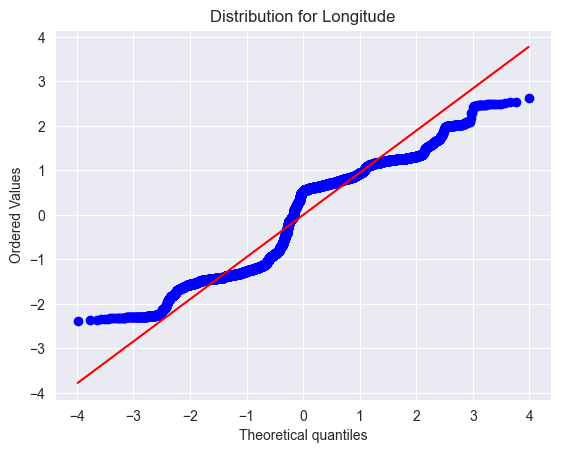

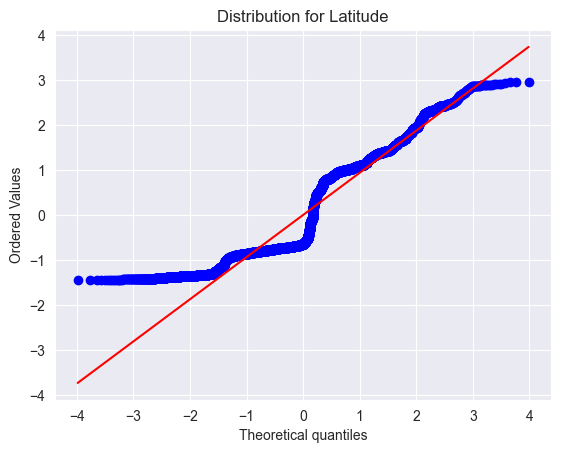

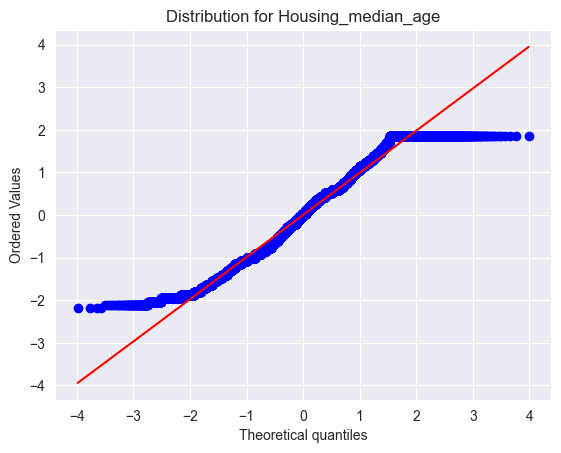

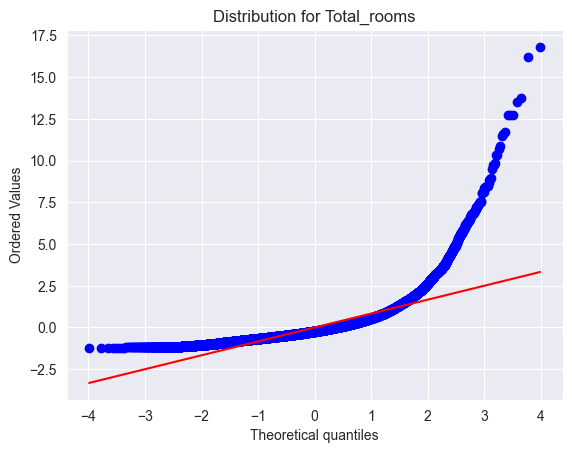

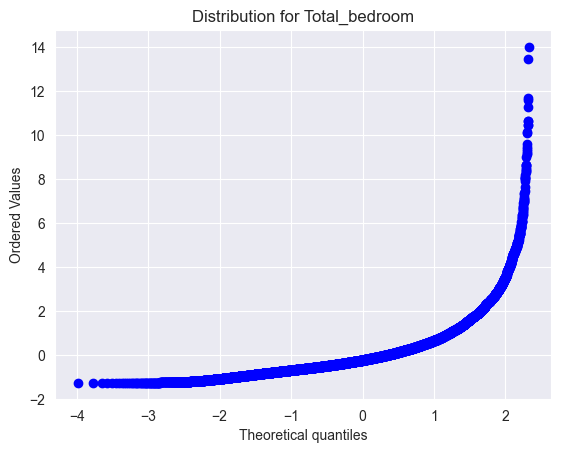

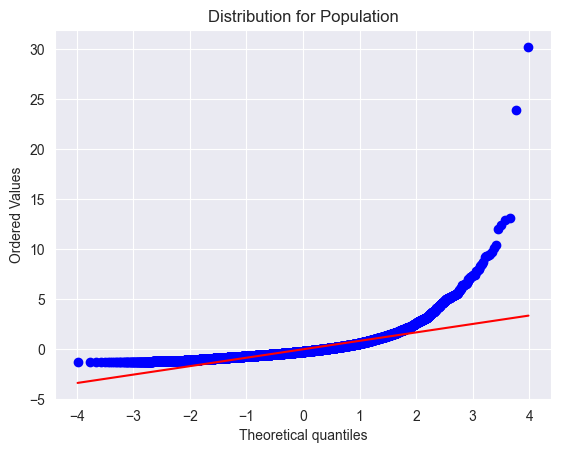

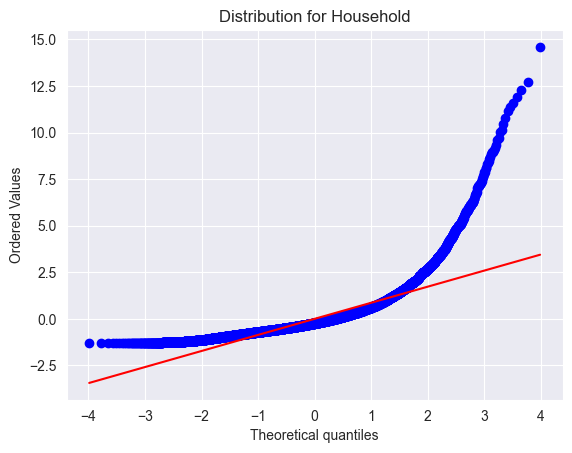

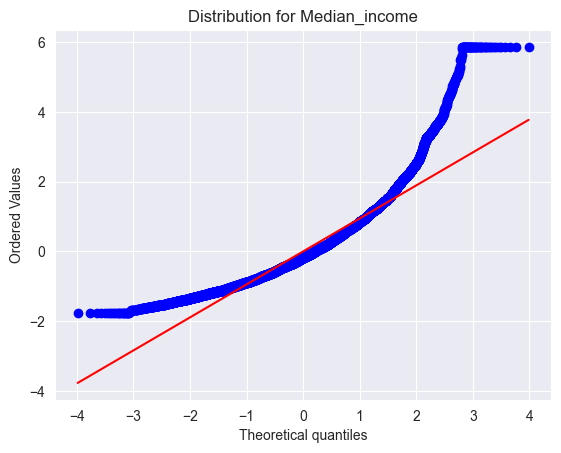

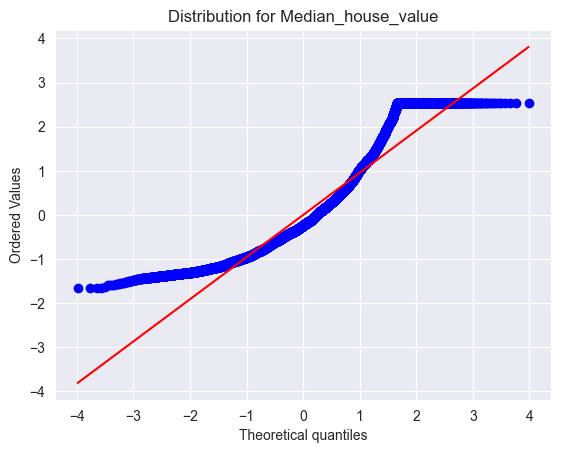

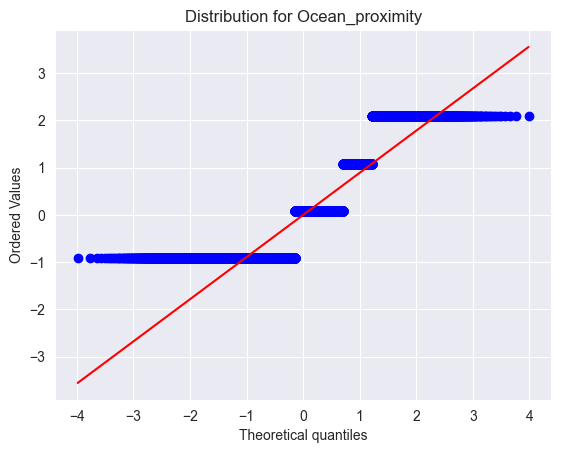

In [90]:
for i in df.columns:
    stats.probplot(df[i], dist="norm", plot=plt)
    plt.title("Distribution for " + i)
    plt.show()